# Lesson 06 Assignment

## Background

    Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their customers with products they didn't want.

    Now that you know a few ensemble models to improve a classification model let's try it out in this assignment.

## Instructions

    It is recommended you complete the lab exercises for this lesson before beginning the assignment.

    Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

    (1) Read in, parse, and pre-process the data
    (2) Perform a brief exploratory analysis
    (3) Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
    (4) Graph the structure of your decision tree
    (5) Graph the confusion matrix of your random forest model
    

In [1]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn import tree
from subprocess import check_call
from IPython.display import Image
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Define Functions

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

## (1) Read in, parse, and pre-process the data

In [3]:
# Reading url

data = pd.read_csv("/Users/matt.denko/Downloads/Bank Data.csv") 
data.columns = ['age',
'sex',
'region',
'income',
'married',
'children',
'car',
'save_act',
'current_act',
'mortgage',
'pep'] 
feature_names = ['age',
'sex',
'region',
'income',
'married',
'children',
'car',
'save_act',
'current_act',
'mortgage'] 
(nrows, ncols) = data.shape
print(data.columns)
data.describe()
data.head()

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
#Removing cases with missing data

data = data.replace(to_replace= "?", value=float("NaN"))
data_null = data.isnull().sum()
print(data_null)
print("There are 0 columns with missing data")

age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64
There are 0 columns with missing data


In [5]:
# Define the target and features:

target_label = 'pep'
feature_labels = [x for x in data.columns if x not in [target_label]]

# Get target and original x-matrix

y = data[target_label]
x = data.as_matrix(columns=feature_labels)

/Users/matt.denko/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [6]:
# Split dataset into training set and test set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                  test_size=0.3,random_state=42) # 70% training and 30% test

le =  ce.OneHotEncoder(return_df=False, handle_missing="ignore", handle_unknown="ignore")

In [7]:
# Fit Model

le.fit(X_train)
X_encoded_train = le.transform(X_train)
X_encoded_test = le.transform(X_test)

## (2) Perform a brief exploratory analysis

In [8]:
# Describe

print(data.describe())

# Head

print(data.head())

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000
   age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO

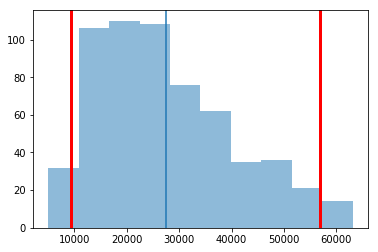

In [9]:
# Histogram - Income

income_hist = plot_hist(data.loc[:,'income'])
plt.show(income_hist)

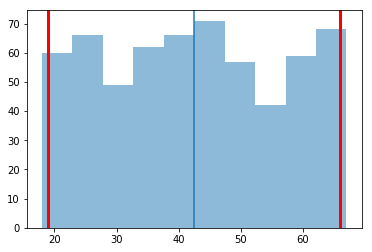

In [10]:
# Histogram - age

age_hist = plot_hist(data.loc[:,'age'])
plt.show(age_hist)

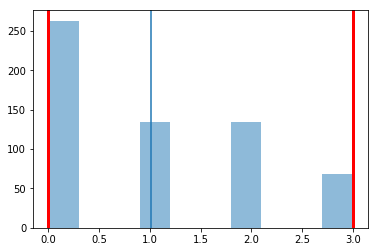

In [11]:
# Histogram - children

child_hist = plot_hist(data.loc[:,'children'])
plt.show(child_hist)

## (3) Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model

### Random Forest

In [12]:
# Random Forest

nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_encoded_train, Y_train)
clf2 = clf.fit(X_encoded_train, Y_train)
print(clf.feature_importances_[:5])
Y_test_hat = clf.predict(X_encoded_test)

[0.13782181 0.01809431 0.01468201 0.         0.01794037]


In [13]:
# Accuracy

accuracy_score(Y_test.str.replace("\\.$", ""), Y_test_hat)

0.7111111111111111

### Decision Tree

In [14]:
# Decision Tree

nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05
gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                   min_samples_leaf=min_node_size)
gbm_clf.fit(X_encoded_train, Y_train)
print(gbm_clf.feature_importances_[:5])
Y_test_hat = gbm_clf.predict(X_encoded_test)

[0.05397026 0.00234146 0.00195594 0.         0.00452071]


In [15]:
# Accuracy

accuracy_score(Y_test.str.replace("\\.$", ""), Y_test_hat)

0.8833333333333333

### Comments:

    The decision tree model had a higher accuracy score for this dataset than the random forest model. The accuracy rate for the random forest model was around .71 while the accuracy rate for the decision tree model was around .88.

## (4) Graph the structure of your decision tree

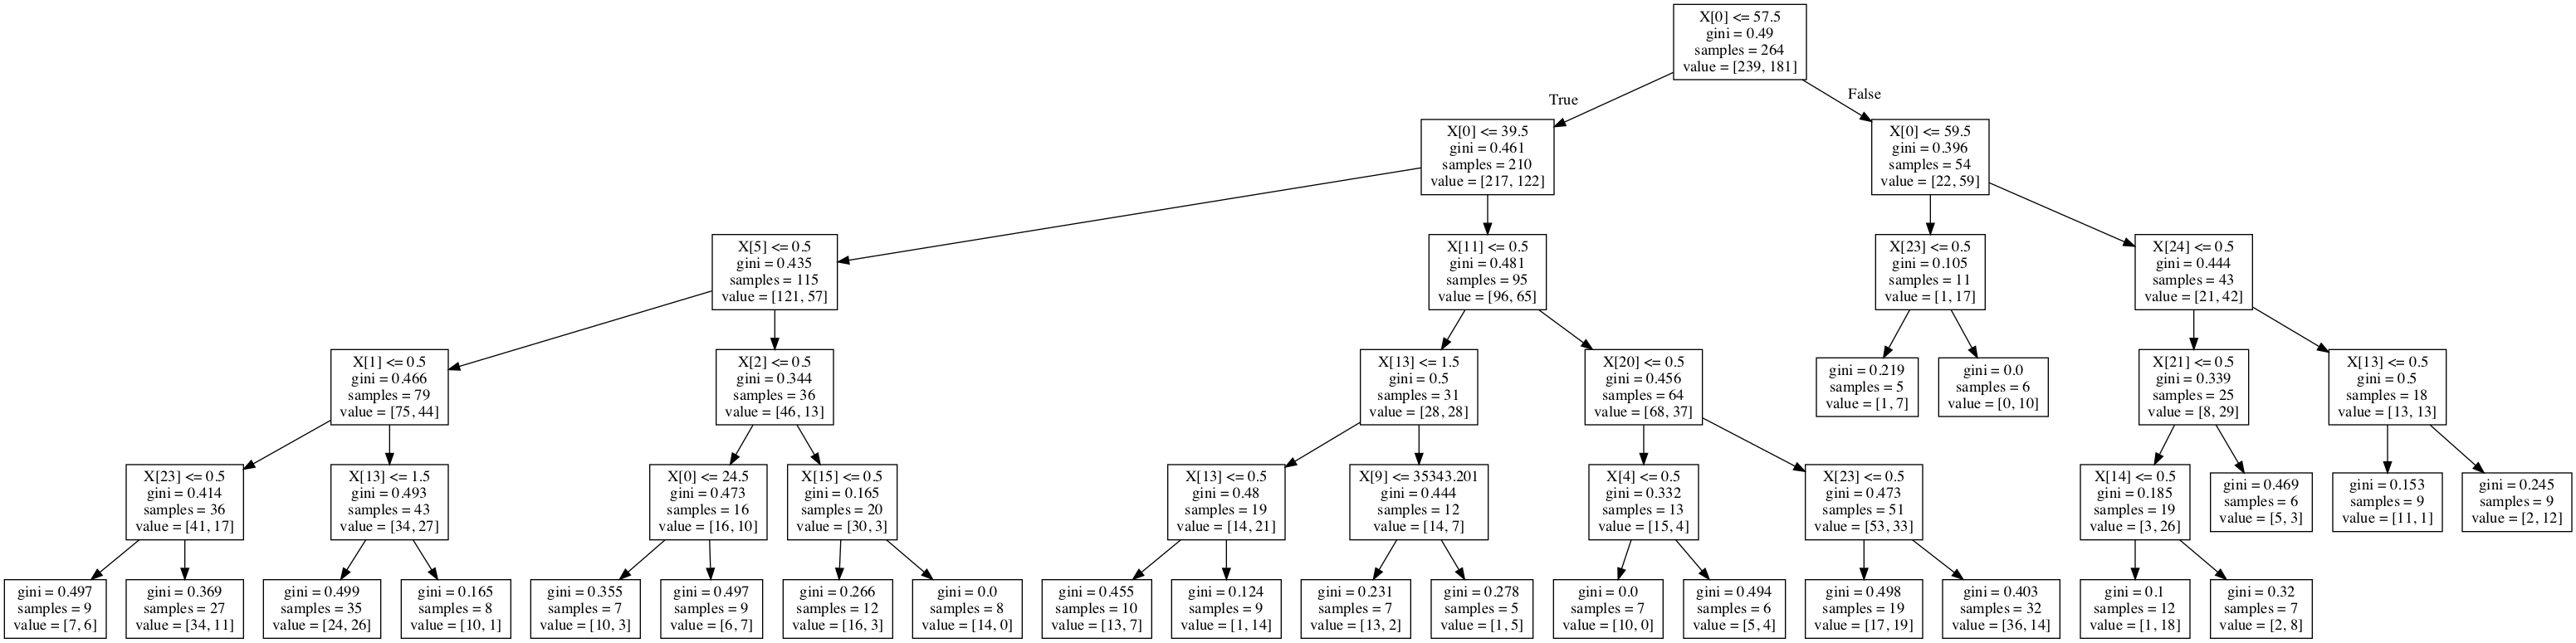

In [16]:
# Graphing Structure of Tree

tree.export_graphviz(clf.estimators_[0], out_file='tree_from_forest.dot')
check_call(['dot','-Tpng','tree_from_forest.dot','-o','tree_from_forest.png'])
Image(filename='tree_from_forest.png', width=500, height=500)

## (5) Graph the confusion matrix of your random forest model

In [17]:
# Creating Confusion Matrix

pd.DataFrame(
    confusion_matrix(Y_test, Y_test_hat),
    columns=['Predicted Say No', 'Predicted Say Yes'],
    index=['True No', 'True Yes']
)

,Predicted Say No,Predicted Say Yes
True No,86,7
True Yes,14,73
